In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

Define some constants to control the number of generated samples and the randomness seed.

In [2]:
N_TRAIN_SAMPLES = 60_000
N_TEST_SAMPLES = 10_000
TOTAL_SAMPLES = N_TRAIN_SAMPLES+N_TRAIN_SAMPLES

SEED = 42
np.random.seed(SEED)

Load the original high-res images:

In [3]:
source_images = [iaa.imageio.imread(path) for path in sorted(glob.glob("original_images/*.png"))]

Define the augmentation pipeline. The values can be modified to get a more challenging dataset:

In [4]:
augmentation = iaa.Sequential([
    iaa.Pad(px=5, keep_size=False),
    iaa.Crop(px=(0, 1)),
    iaa.Rotate((-20, 20)),
    iaa.ShearX((-7,7)),
    iaa.ShearY((-7,7)),
    iaa.ElasticTransformation(sigma=(10, 20), alpha=(30, 120)),
    iaa.Resize((28, 28)),
    
])

Generate the augmented images, and the associated class labels:

In [5]:
X, Y = [], []

generated_samples = 0

while generated_samples < TOTAL_SAMPLES:
    samples_to_generate = min(len(source_images), TOTAL_SAMPLES - generated_samples)
    X.append(augmentation(images=source_images)[:samples_to_generate])
    Y += list(range(len(source_images)))[:samples_to_generate]
    generated_samples += samples_to_generate
        
X, Y = np.concatenate(X), np.asarray(Y).astype(np.uint8)

Plot some samples to get an idea of the results:

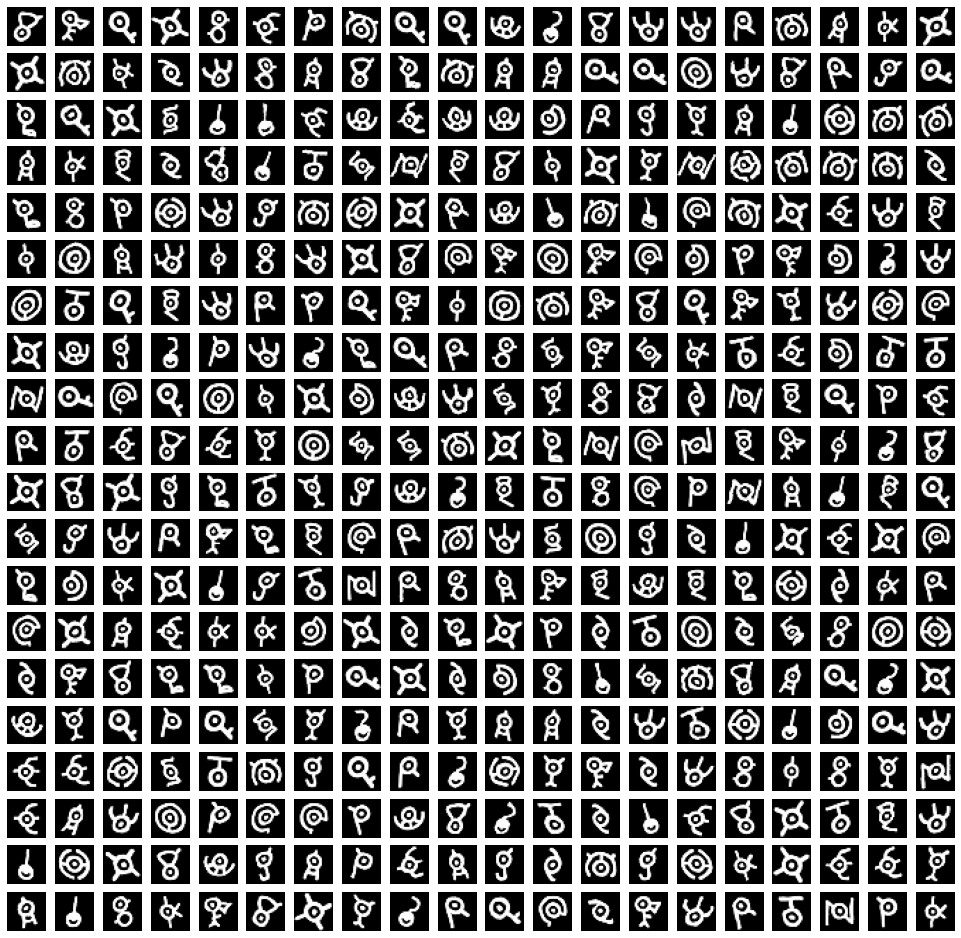

In [6]:
plt.figure(figsize=(17,17))
for i in range(20):
    for j in range(20):
        
        ax = plt.subplot(20,20, 20*i+j+1)
        
        ax.imshow(X[np.random.randint(X.shape[0])], cmap="gray", interpolation=None)
        ax.axis('off')

Split the data to form the training and test sets:

In [7]:
idxs = np.arange(70000)
np.random.shuffle(idxs)

X_train, X_test = X[idxs[:60000]], X[idxs[60000:]]
Y_train, Y_test = Y[idxs[:60000]], Y[idxs[60000:]]

Save the results to disk as serialized numpy arrays:

In [8]:
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("Y_train.npy", Y_train)
np.save("Y_test.npy", Y_test)